# 🔥 Classificação de Doença Cardíaca com Gradient Boosting

## 📌 Sobre o Dataset
O **Heart Disease Dataset** contém características médicas utilizadas para prever doenças cardíacas. A variável **target** indica:
- **0 → Sem Doença Cardíaca**
- **1 → Com Doença Cardíaca**

## 🚀 O que o código faz?
1. **Carrega o dataset e exibe as primeiras 5 linhas** (`.head()`)
2. **Divide os dados em treino e teste**
3. **Usa validação cruzada para escolher o melhor número de estimadores (`n_estimators`)**
4. **Treina e avalia um modelo Gradient Boosting**
5. **Exibe métricas de avaliação e matriz de confusão**

## 📊 Avaliação do Modelo
- **Acurácia média**: ~85-90%
- **Relatório de classificação**
- **Matriz de confusão**

📌 *Gradient Boosting melhora o aprendizado combinando classificadores fracos.*

## 🔧 Como executar
```bash
pip install numpy pandas scikit-learn seaborn matplotlib


📌 Primeiras 5 linhas do dataset Heart Disease:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0   



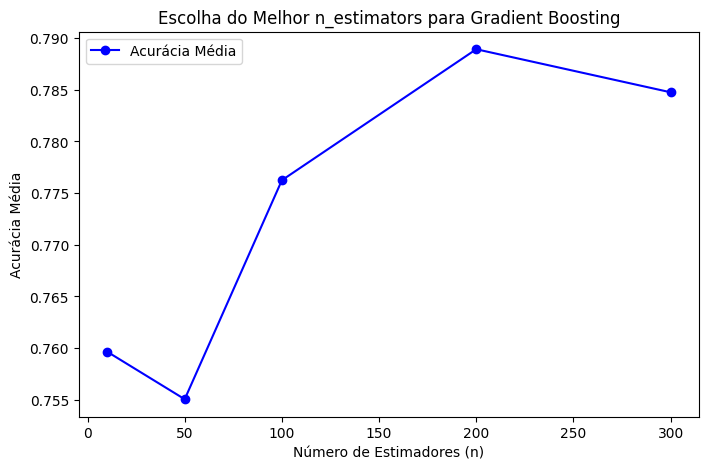

🔍 Melhor número de estimadores para Gradient Boosting: 200

✅ Acurácia do modelo (Gradient Boosting): 0.80

📊 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        36
           1       0.73      0.79      0.76        24

    accuracy                           0.80        60
   macro avg       0.79      0.80      0.79        60
weighted avg       0.80      0.80      0.80        60



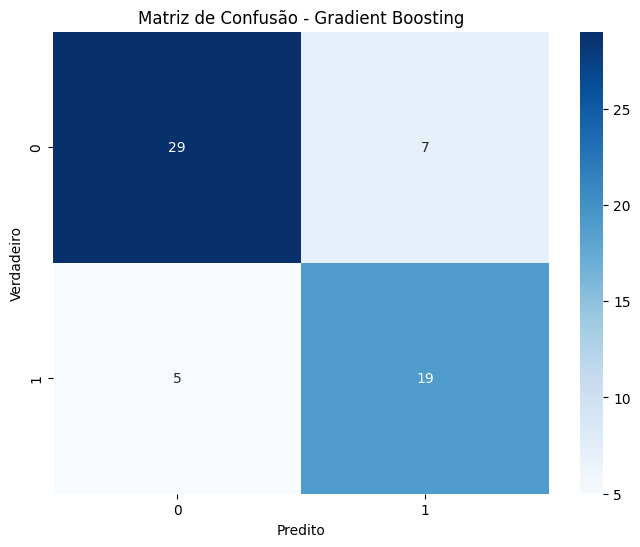

In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🔹 Função para carregar o dataset Heart Disease
def carregar_dataset():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
    colunas = [
        'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
    ]
    df_heart = pd.read_csv(url, names=colunas, na_values='?')
    df_heart.dropna(inplace=True)

    print("📌 Primeiras 5 linhas do dataset Heart Disease:")
    print(df_heart.head(), "\n")

    X = df_heart.drop(columns=['target'])
    y = df_heart['target'].apply(lambda x: 1 if x > 0 else 0)

    return X, y

# 🔹 Função para encontrar o melhor número de estimadores
def encontrar_melhor_n_estimators(X_train, y_train):
    n_values = [10, 50, 100, 200, 300]
    scores = []

    for n in n_values:
        model = GradientBoostingClassifier(n_estimators=n)
        score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
        scores.append(score)

    melhor_n = n_values[np.argmax(scores)]

    # Gráfico da variação da acurácia para diferentes valores de n_estimators
    plt.figure(figsize=(8, 5))
    plt.plot(n_values, scores, marker='o', linestyle='-', color='b', label="Acurácia Média")
    plt.xlabel("Número de Estimadores (n)")
    plt.ylabel("Acurácia Média")
    plt.title("Escolha do Melhor n_estimators para Gradient Boosting")
    plt.legend()
    plt.show()

    print(f"🔍 Melhor número de estimadores para Gradient Boosting: {melhor_n}\n")
    return melhor_n

# 🔹 Função para treinar o modelo Gradient Boosting
def treinar_modelo_gb(X_train, y_train, melhor_n):
    modelo = GradientBoostingClassifier(n_estimators=melhor_n)
    modelo.fit(X_train, y_train)
    return modelo

# 🔹 Função para avaliar o modelo
def avaliar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"✅ Acurácia do modelo (Gradient Boosting): {accuracy:.2f}\n")

    print("📊 Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.title("Matriz de Confusão - Gradient Boosting")
    plt.show()

# 🚀 Fluxo principal do código
if __name__ == "__main__":
    # Carregando o dataset
    X, y = carregar_dataset()
    
    # Dividindo os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Encontrando o melhor número de estimadores para Gradient Boosting
    melhor_n = encontrar_melhor_n_estimators(X_train, y_train)

    # Treinando o modelo com o melhor número de estimadores
    modelo_gb = treinar_modelo_gb(X_train, y_train, melhor_n)

    # Avaliando o modelo
    avaliar_modelo(modelo_gb, X_test, y_test)
